# End - End Machine Leaning project

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

#Loading data and Preprocessing

  * Loading data from different sources.
  * Handling missing values and outliers.
  * Feature scaling and normalization.
  * One-hot encoding for categorical variables.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving housing.csv to housing (1).csv
User uploaded file "housing (1).csv" with length 1423529 bytes


In [ ]:
housing = pd.read_csv('housing.csv')

# Exploratory Data Analysis(EDA)
  * Basic data visualization using libraries like Matplotlib and seaborn
  * Correlation analysis.
  * Data distribution and summary statistics.

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

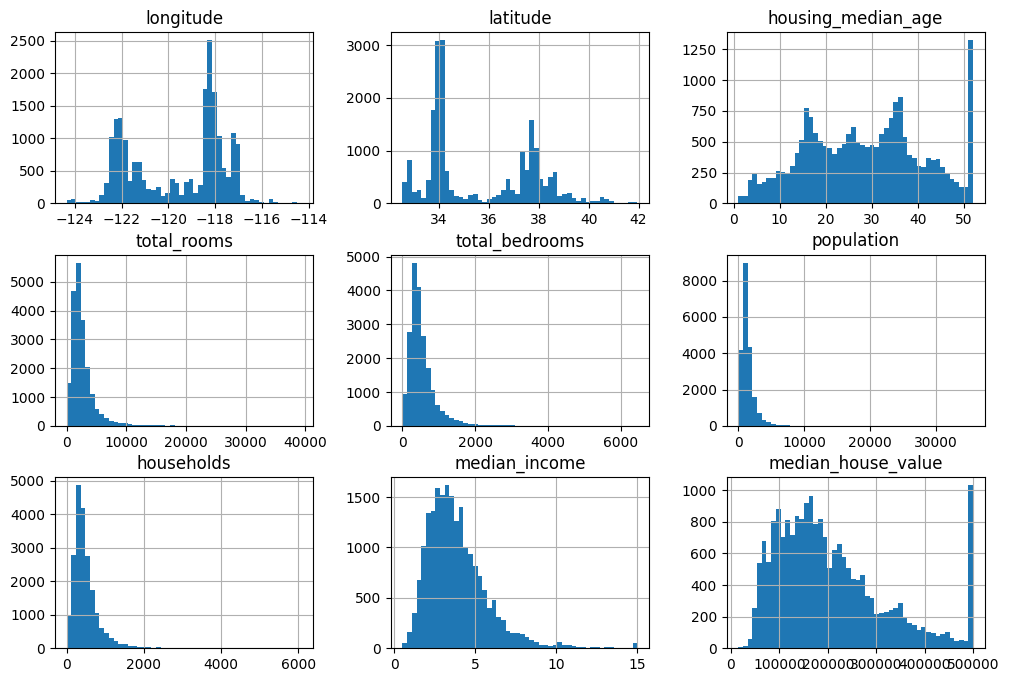

In [ ]:
housing.hist(bins=50, figsize = (12,8))
plt.show()

## Create a Test Set

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=64)

In [ ]:
train_set["total_bedrooms"].isnull().sum()

166

In [ ]:
test_set["total_bedrooms"].isnull().sum()

41

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

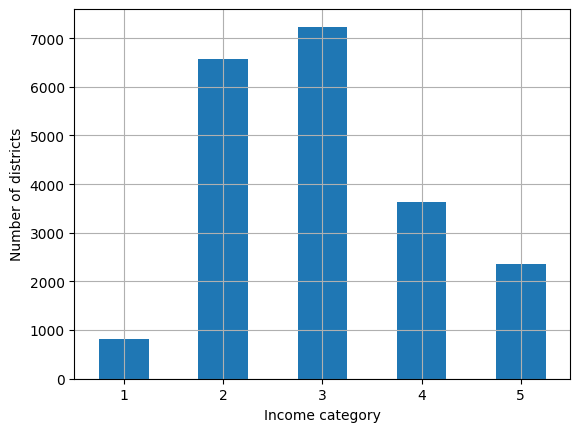

In [ ]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [ ]:
strat_train_set, strat_test_set = strat_splits[0]

In [ ]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

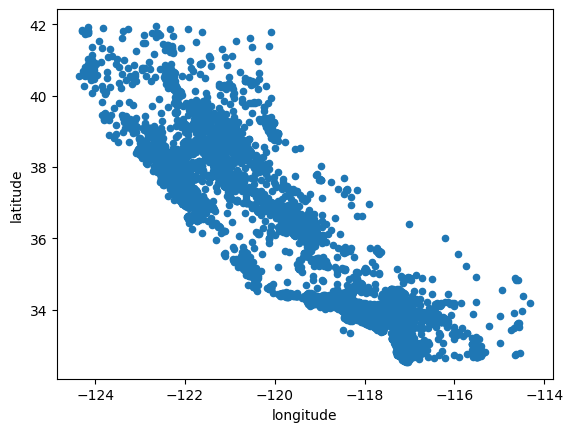

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

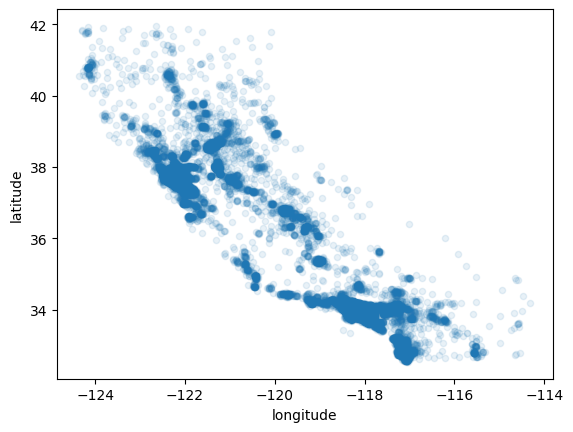

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

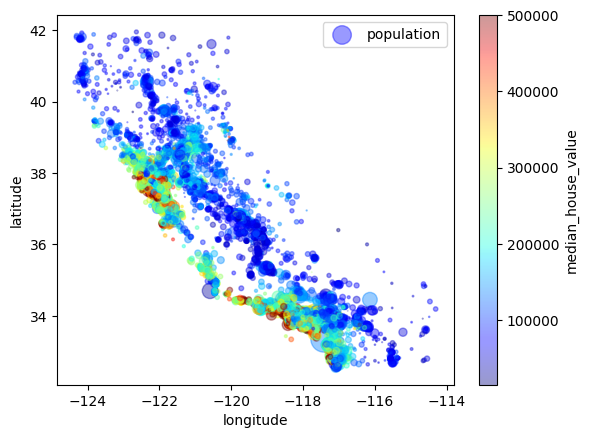

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             )
plt.legend()

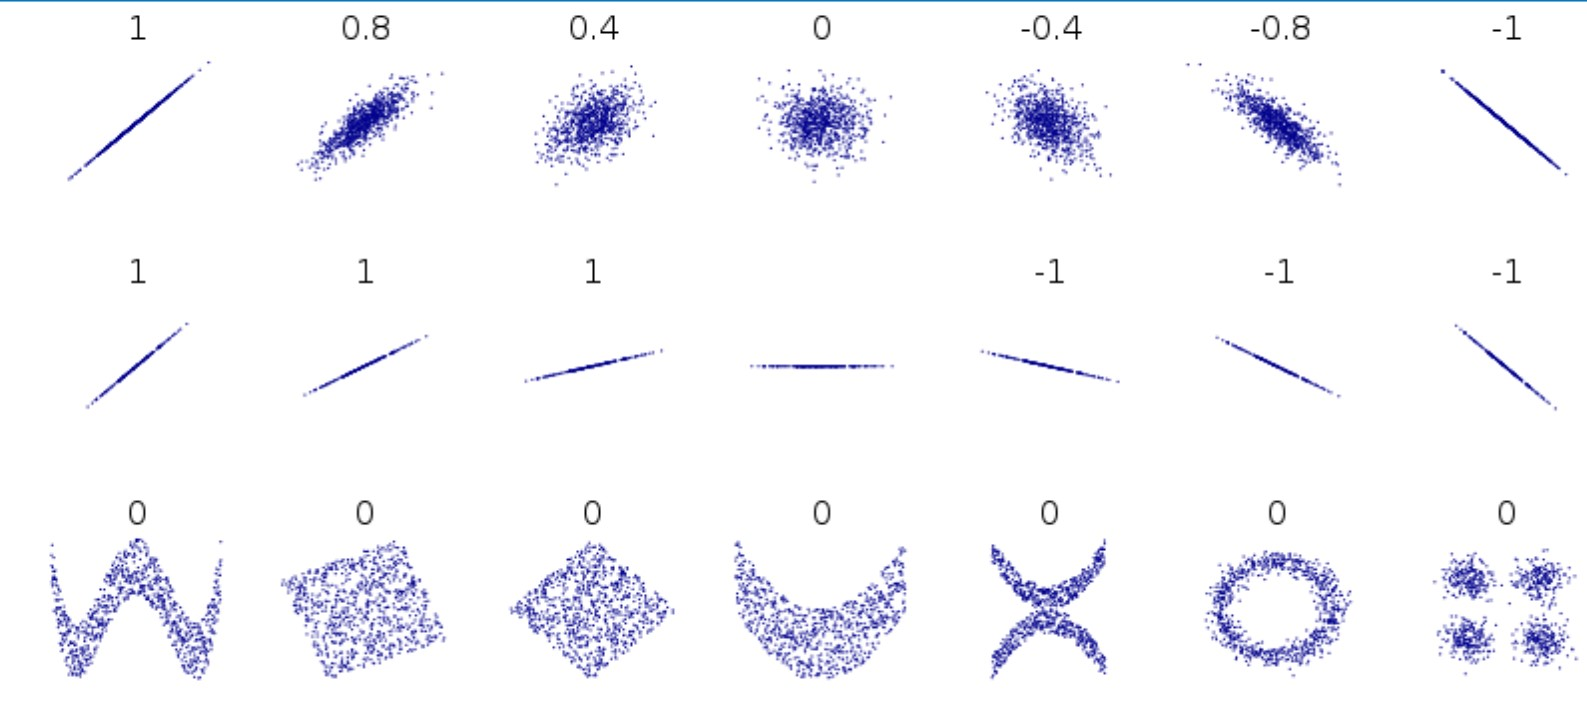

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-29-51a0e6bf2eb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

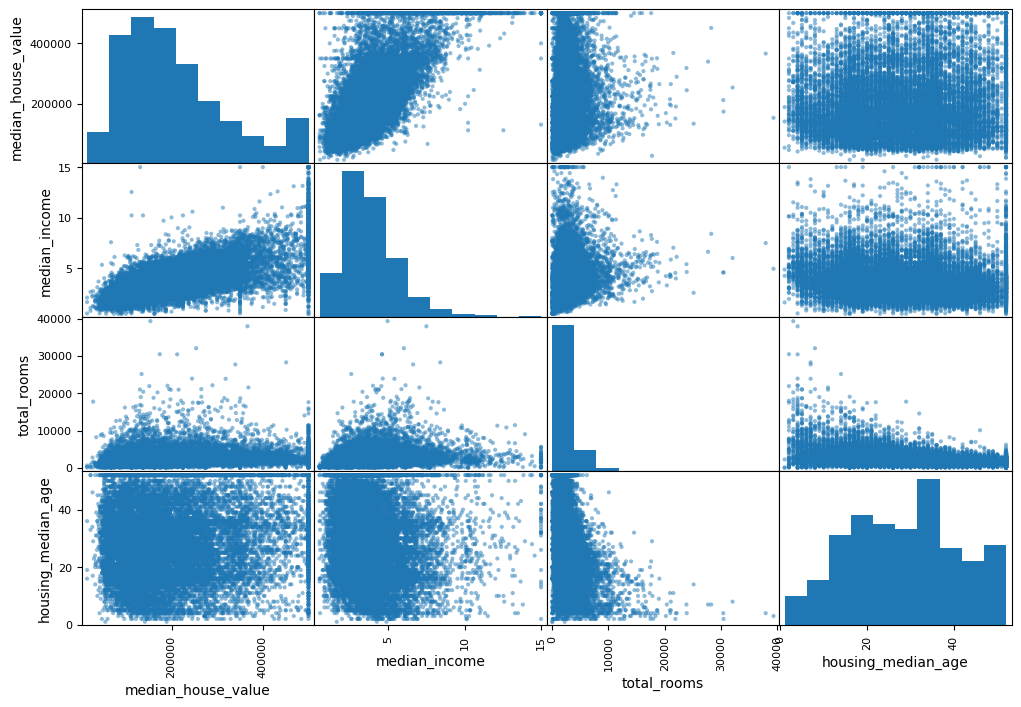

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

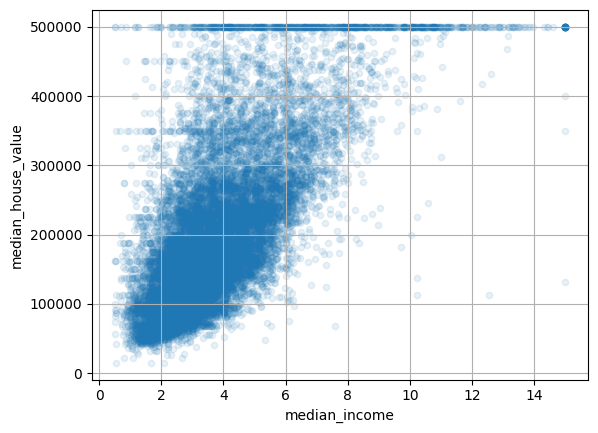

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

# Feature Selection and Engineering
  * Importance of feature selection.
  * Feature importance using tree-based models.
  * Creating new features

### Remember the features we calculate last week?


In [ ]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-33-51a0e6bf2eb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [ ]:
housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [ ]:
null_rows_idx = housing.isnull().any(axis=1)

In [ ]:
null_rows_idx

12655    False
15502    False
2908     False
14053    False
20496    False
         ...  
15174    False
12661    False
19263    False
19140    False
19773    False
Length: 16512, dtype: bool

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Is the same as we compute the median by numpy operations.

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

# API Skickit-Learn Design

All objects in scikit-learn share a uniform common basic API consisting in complementary interfaces: an *estimator* interface for building and fitting models, a *predictor* interface for making prefdictors and a *transformer* interface for converting data.



## General principles
The API is designed to adhere to the following brad principles:

* **Consistency.** All objects share consistent interface composed of a limited set of methods.

* **Inspection.** Constructor parameters and parameters values determined by learning algorithms are stored and exposed as public attributes. All the estimator's learned parameters are also accessible. For example, ```imputer.statics_```

* **Non-proliferation of classes.** Learning algorithms are the only objects to be represented using custom classes. Datasets are represented as NumPy arrays or SciPy sparce matrices. Hyper-parameter names and values are represented as standar Python strings or numbers whenever is possible.

* **Composition.** Many ML tasks are expressible as sequence or combinations of transformations to data. Some learning algorithms are also naturally viewed as meta-algorithms parametrized on other algorithms. Whenever feasible, such algorithms are implemented and composed from existing building blocks.

* **Sensible defaults.** Wheneve an operation requires a user defined parameter, an a appropiate default value is defined to be performed in a sensible way.


# Estimators

The *estimator* interface is the core of the library. It defines instantiation mechanism of objects and can estimate some parameters based on a dataset, for instance, an ```imputer``` is an estimator.

The estimation itself is performed by the ```fit()``` ,method, and it takes only a dataset as parameter or two for supervised learning algorithms. Any other parameter needed to guide the estimation process is considered hyperparameter, and must be set as an instance variable.

#Transformer

Some estimators can also transform a dataset; these are called *transformers*. The API is also simple, the transformation is performed by the ```transform()``` method with the dataset to transform as a paremeter. It returns a transformed dataset. This transformation is usually relies on the learned parameters.
All transformers also have a convenience emthod called ```fit_transform()``` that is equivalent to calling first ```fit()``` and then ```transform()```.

# Predictors

Finally, some estimators are capable of making predictions given a dataset; they are called *predictors*


Transform the training set:

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [ ]:
housing_tr = pd.DataFrame(X,columns = housing_num.columns,index = housing_num.index)

In [ ]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [ ]:
imputer.strategy

'median'

### Handling Text and Categorical Attributes.

Now let's preprocess the categorical input feature, ```ocean_proximity```

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_encoded[:8]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

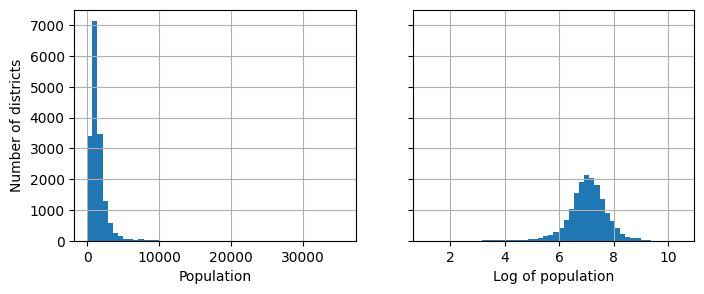

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

### Custom Transformations

If you want to write your own cleanup operatins or combining spcific attributes, you need to construct your own transformer to work seamlessly with ```scikit-learn``` functionalities, you need to implement three methods: ```fit()```, ```transform()``` and ```fit_transform()```.

You can get the last method simply add the ```TransformerMixin``` base class. If you add the class ```BaseEstimator``` as a base class you will get two extra methods: ```get_params()```, ```set_params()```

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [ ]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # nothing else to do
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Transformation by Pipelines

Many data transformations steps that need to be executed in the right order. With pipeline class we can define a sequence of transformations

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])

The ```Pipeline``` constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers(i.e., they must have a ```fit_transform()``` method).

When you call the pipeline's ```fit()``` method, it calls the ```fit_transform()``` sequentially on all transformers, passing the output of each call as the parameter to the next call, until the las estimator, for which just calls the ```fit()``` method.

In [ ]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

### Pipeline with categorical data


In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [ ]:
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attribs),])
housing_prepared = full_pipeline.fit_transform(housing)

#Model Selection
  * Overview of different types of machine learning algorithms(classification, regression, clustering).
  * Choosing the right algorithm for the problem
  * Evaluating model complexity an bias-variance tradeoff

### Lineal regresion



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

### Tree decisions

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#Model Training and Evaluation
  * Splitting data into training an testing sets
  * Cross-validation techniques.
  * Metrics for classification (accuracy, precision, recall, F1-score) and regression (MSE, RMSE, R-squared)

### Cross-validation

10-fold cross validation

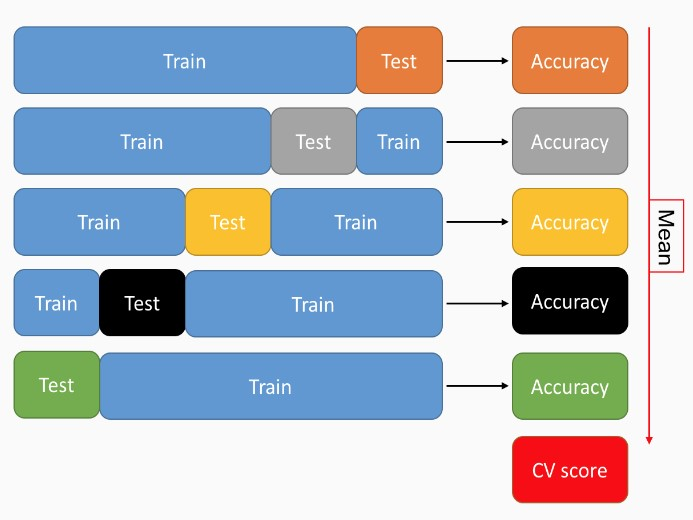

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
tree_rmse_scores

array([72110.42161496, 68532.59579027, 69462.541105  , 72354.83698955,
       69665.63741022, 78471.13585038, 70750.47610595, 73364.19830639,
       68003.5411077 , 71102.91474986])

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
display_scores(tree_rmse_scores)

Scores: [72110.42161496 68532.59579027 69462.541105   72354.83698955
 69665.63741022 78471.13585038 70750.47610595 73364.19830639
 68003.5411077  71102.91474986]
Mean: 71381.82990302841
Standard deviation: 2868.8323344388946


Try now with the linear regression model

In [ ]:
#Cross-validaton
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180634


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Regresión con random forest
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51527.9823303  48893.76993244 46638.71278677 52108.51127037
 47395.651762   52163.15169973 52581.37723128 49561.93049229
 48374.72662205 53580.48905296]
Mean: 50282.630318018244
Standard deviation: 2286.5351788353923


#Hyperparameter Tuning

  * Grid search and random search for hyperparameter optimization
  * Using ```GridSearchCV``` and ```RandomizedSearchCV``` in scikit-learn
  

### Search of best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Grid of parameters
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, ]

In [ ]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [ ]:
print("Grid mejores parámetros: ",grid_search.best_params_)
print("Grid mejor estimador: ",grid_search.best_estimator_)

Grid mejores parámetros:  {'max_features': 6, 'n_estimators': 30}
Grid mejor estimador:  RandomForestRegressor(max_features=6, n_estimators=30)


In [ ]:
cvres = grid_search.cv_results_
print("Resultados de Grid search")
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

Resultados de Grid search
63852.73043781115 {'max_features': 2, 'n_estimators': 3}
55506.61064147361 {'max_features': 2, 'n_estimators': 10}
52670.86430695029 {'max_features': 2, 'n_estimators': 30}
60144.97760898245 {'max_features': 4, 'n_estimators': 3}
52807.81443284425 {'max_features': 4, 'n_estimators': 10}
50311.10391173935 {'max_features': 4, 'n_estimators': 30}
58392.000254128754 {'max_features': 6, 'n_estimators': 3}
52031.616301762166 {'max_features': 6, 'n_estimators': 10}
50056.17752059654 {'max_features': 6, 'n_estimators': 30}
59389.22089205781 {'max_features': 8, 'n_estimators': 3}
52112.436443121835 {'max_features': 8, 'n_estimators': 10}
50103.60243909055 {'max_features': 8, 'n_estimators': 30}
62201.355644726595 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54117.63149052239 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59843.932392448616 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52381.18555581305 {'bootstrap': False, 'max_f

# Class activity
Try with a another set of parameters

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
print("Importancia de características:",feature_importances)

Importancia de características: [7.61569861e-02 6.55946693e-02 4.56646281e-02 1.80734164e-02
 1.63304899e-02 1.78289949e-02 1.76941501e-02 3.33855245e-01
 6.19427737e-02 1.05463723e-01 8.04499140e-02 1.62558340e-02
 1.35712255e-01 1.22557951e-04 2.94549147e-03 5.90887071e-03]


In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33385524453411214, 'median_income'),
 (0.1357122554491454, 'INLAND'),
 (0.10546372322171171, 'pop_per_hhold'),
 (0.08044991402382103, 'bedrooms_per_room'),
 (0.07615698613827, 'longitude'),
 (0.06559466933579264, 'latitude'),
 (0.06194277365520762, 'rooms_per_hhold'),
 (0.04566462813223523, 'housing_median_age'),
 (0.018073416445689973, 'total_rooms'),
 (0.017828994866059322, 'population'),
 (0.017694150073569972, 'households'),
 (0.016330489944028068, 'total_bedrooms'),
 (0.01625583404421617, '<1H OCEAN'),
 (0.005908870711377388, 'NEAR OCEAN'),
 (0.0029454914733946557, 'NEAR BAY'),
 (0.00012255795136874252, 'ISLAND')]

### Test  your model in the test set

In [ ]:
final_model = grid_search.best_estimator_

NameError: ignored

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
final_predictions = final_model.predict(X_test_prepared)

In [ ]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

NameError: ignored

In [ ]:
print("Final: ",final_rmse)

Final:  48314.68330516941


#Model Deployment and Persistence

  * Saving and loading trained models.
  * Using ```joblib```.
  

In [ ]:
import joblib

In [ ]:
joblib.dump(final_model, "my_model.pkl")
# cargar modelo
my_model_loaded = joblib.load("my_model.pkl")

In [ ]:
some_data = housing.iloc[:10]
some_labels = housing_labels.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", my_model_loaded.predict(some_data_prepared))
print("Labels:", list(some_labels))
model_mse = mean_squared_error(some_labels, my_model_loaded.predict(some_data_prepared))
model_rmse = np.sqrt(model_mse)
model_rmse

Predictions: [ 77220.         302963.36666667  80913.33333333 127750.
 228210.         165076.66666667 419120.13333333 334053.33333333
 176326.66666667 359850.6       ]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0, 165700.0, 412300.0, 349600.0, 181300.0, 500001.0]


45678.32566103608

#Ensemble Learning
  * Bagging, booting and stacking.
  * Random Forest and Gradient Boosting MAchines
  * Combining multiple models for improved performance.